<a href="https://colab.research.google.com/github/Akash-le0/Car_Price_Prediction_using_python/blob/main/Car_Price_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading the dataset**

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving car data.csv to car data.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [5]:
from sklearn import metrics #used in evaluating our models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso


**Data Pre-processing and cleaning**

In [11]:
cars_data = pd.read_csv('car data.csv')
cars_data.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [12]:
cars_data.isnull().sum() #to check missing values

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
len(cars_data) #verifying the total number of records
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
#for saving memory we will try to categorise the columns where ever applicable
cars_data = cars_data.astype({"Fuel_Type":'category',"Transmission":'category',"Seller_Type":'category'})
cars_data.info() #since the dataset is small it is reduced by ~6KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Car_Name       301 non-null    object  
 1   Year           301 non-null    int64   
 2   Selling_Price  301 non-null    float64 
 3   Present_Price  301 non-null    float64 
 4   Kms_Driven     301 non-null    int64   
 5   Fuel_Type      301 non-null    category
 6   Seller_Type    301 non-null    category
 7   Transmission   301 non-null    category
 8   Owner          301 non-null    int64   
dtypes: category(3), float64(2), int64(3), object(1)
memory usage: 15.5+ KB


In [15]:
cars_data['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

<ipython-input-16-7cebde1d4188>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cars_data.corr()
<ipython-input-16-7cebde1d4188>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(cars_data.corr(), cmap="YlGnBu", annot=True)


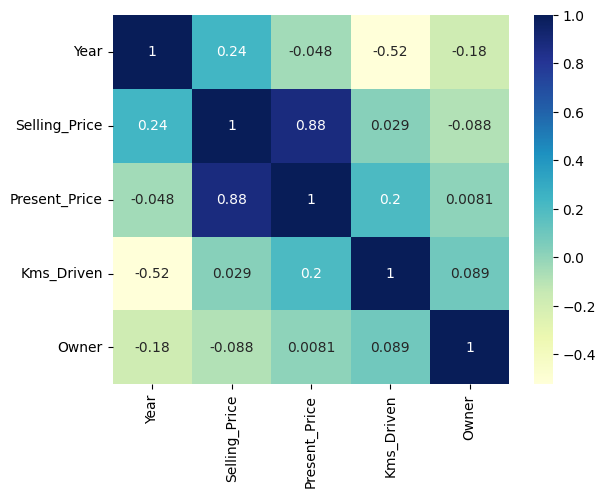

In [16]:
cars_data.corr()
dataplot = sb.heatmap(cars_data.corr(), cmap="YlGnBu", annot=True)


In [17]:
cars_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
cars_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
cars_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
cars_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [19]:
cars_data['Transmission']
cars_data[['Transmission','Fuel_Type','Seller_Type']].value_counts()

Transmission  Fuel_Type  Seller_Type
0             0          0              116
                         1               95
              1          0               48
1             0          0               18
              1          0               11
              0          1               10
0             2          0                2
1             1          1                1
dtype: int64

**Preliminary spliting of dependent and independent variables**

In [20]:
X = cars_data.drop(['Car_Name','Selling_Price'],axis=1) #independent variables
Y = cars_data['Selling_Price'] #dependent variable

In [21]:
print(X)

     Year  Present_Price  Kms_Driven Fuel_Type Seller_Type Transmission  Owner
0    2014           5.59       27000         0           0            0      0
1    2013           9.54       43000         1           0            0      0
2    2017           9.85        6900         0           0            0      0
3    2011           4.15        5200         0           0            0      0
4    2014           6.87       42450         1           0            0      0
..    ...            ...         ...       ...         ...          ...    ...
296  2016          11.60       33988         1           0            0      0
297  2015           5.90       60000         0           0            0      0
298  2009          11.00       87934         0           0            0      0
299  2017          12.50        9000         1           0            0      0
300  2016           5.90        5464         0           0            0      0

[301 rows x 7 columns]


In [22]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 2)

**Training the model**

In [24]:
lin = LinearRegression()

In [30]:
lin.fit(X_train, Y_train)

LinearRegression()

In [31]:
training_data_pred = lin.predict(X_train)

**Evaluation of training dataset**

In [32]:
r_square = metrics.r2_score(Y_train, training_data_pred)
print("The R^2 Square value is:", r_square)

The R^2 Square value is: 0.8799451660493711


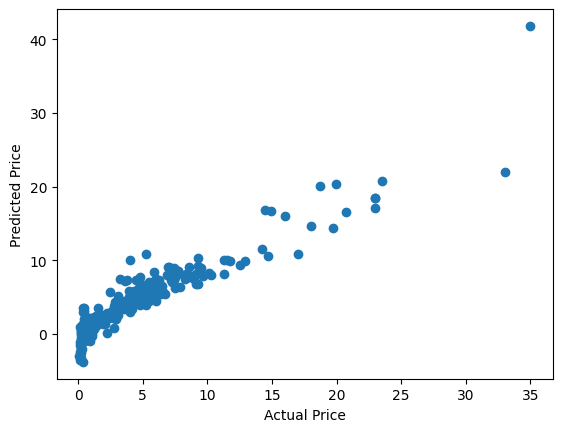

In [33]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Checking the test data**

In [34]:
test_data_pred = lin.predict(X_test)

**Evaluating test data**

In [35]:
r_square = metrics.r2_score(Y_test, test_data_pred)
print("The R^2 Square value is:", r_square)

The R^2 Square value is: 0.8365766715027051


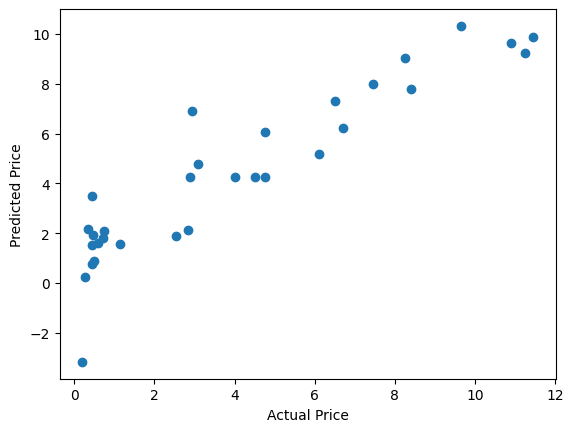

In [36]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**ROOT MEAN SQUARED VALUE**

In [48]:
mse = mean_squared_error(Y_test, test_data_pred)
print (mse)
rmse = math.sqrt(mse)
print("The root mean squared value is", rmse )

2.1501299189836294
The root mean squared value is 1.4663321311979867


**DETERMINING THE FIT OF THE MODEL**

In [61]:
lin.score(X_test,Y_test)

0.8365766715027051

In [62]:
lin.score(X_train,Y_train)

0.8799451660493711

In [65]:
lin.predict([[2014,5.59,27000,0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.83901354])

**Lasso Regression**

In [49]:
lasso = Lasso()

In [50]:
lasso.fit(X_train, Y_train)

Lasso()

In [51]:
training_data_pred = lasso.predict(X_train)

**Evaluation of training dataset**

In [52]:
r_square = metrics.r2_score(Y_train, training_data_pred)
print("The R^2 Square value is:", r_square)

The R^2 Square value is: 0.8427856123435794


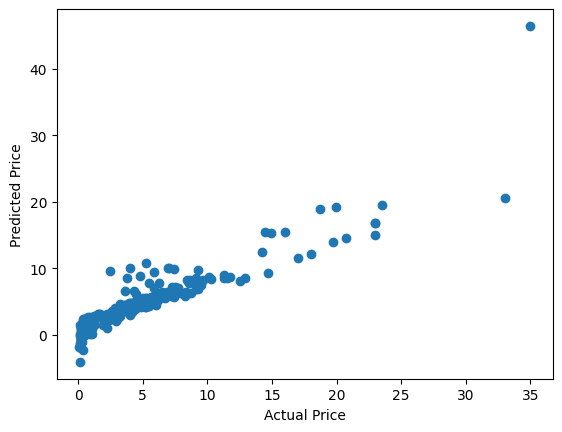

In [53]:
plt.scatter(Y_train, training_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

**Checking the test data**

In [54]:
test_data_pred = lasso.predict(X_test)

**Evaluating test data**

In [55]:
r_square = metrics.r2_score(Y_test, test_data_pred)
print("The R^2 Square value is:", r_square)

The R^2 Square value is: 0.8709167941173195


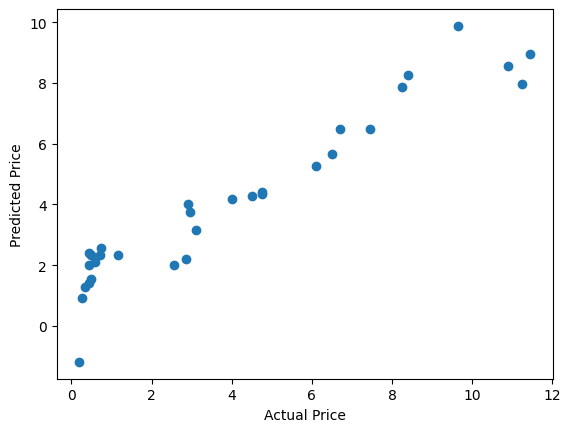

In [56]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
import math

**ROOT MEAN SQUARED VALUE **

In [57]:
mse = mean_squared_error(Y_test, test_data_pred)
print (mse)
rmse = math.sqrt(mse)
print("The root mean squared value is", rmse )


1.6983234006965484
The root mean squared value is 1.3031973759552113


**DETERMINING THE FIT OF MODEL**

In [58]:
lasso.score(X_test,Y_test)

0.8709167941173195

In [60]:
lasso.score(X_train,Y_train)

0.8427856123435794

In [66]:
lasso.predict([[2014,5.59,27000,0,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([3.8257306])